In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]].values

In [5]:
X 

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [21]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics
from sklearn.datasets import make_blobs
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6,
                            random_state=0)

In [22]:
cluster_centers = ms.cluster_centers_
labels = ms.labels_
n_clusters_ = len(cluster_centers)

print('Estimated number of clusters: %d' % n_clusters_)


Estimated number of clusters: 3


In [12]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

Estimated number of clusters: 3


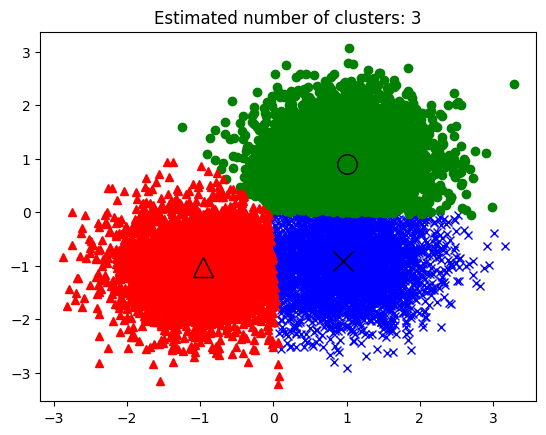

In [24]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
markers = ["x", "o", "^"]
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[class_members, 0], X[class_members, 1],markers[k], color=col)
    plt.plot(cluster_center[0], cluster_center[1], markers[k],markerfacecolor=col, 
             markeredgecolor='k', markersize=14)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()



In [28]:
supervised=dataset

In [29]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [30]:
labels = labels[:len(supervised)]  # Trim 'labels' to match the length of the DataFrame
supervised['Cluster_Group'] = labels

In [31]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


In [32]:
supervised.to_csv("cluster.csv",index=False)


In [33]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


In [34]:
dir(ms)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'bandwidth',
 'bin_seeding',
 'cluster_all',
 'cluster_centers_',
 'fit',
 'fit_predict',
 'get_metadata_routing',
 'get_params',
 'labels_',
 'max_iter',
 'min_bin_freq',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'predict',

In [35]:
labels

array([0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1,
       1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1,
       2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 1,
       2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0,
       1, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0,
       1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2,
       1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0,
       0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2,
       0, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0], dtype=int64)